___
# Análise Exploratória: Variáveis qualitativas
___

## Aula 02


**Links Úteis:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 16 – destacando para variáveis qualitativas.
2.	10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
3.	Essential Basic Functionality: http://pandas.pydata.org/pandas-docs/stable/basics.html

**Hoje:**
1.	Analisar variáveis qualitativas de forma uni e bivariadas utilizando tabelas de frequências e gráficos de barras e de pizza (ou setor).

**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 17 – destacando para variáveis quantitativas; pág. 106 e 107 (Definição 4.1 e Exemplo 4.1).

___


## <font color='blue'>Empresa de TV</font>

Uma empresa de TV via satélite criou recentemente dois tipos de planos de canais (A e B).

A empresa tem como objetivo estudar o perfil dos clientes que aderiram ao plano para enviar malas diretas aos potenciais clientes de cada tipo de plano.

A base de dados apresenta algumas variáveis para uma amostra de 82 clientes selecionados aleatoriamente dentre aqueles que aderiram aos planos. As variáveis têm os seguintes significados:

* CLIENTE: identificador do cliente.
* PLANO: apresenta o plano adquirido pelo cliente, A ou B. 
* EC: apresenta estado civil do cliente no momento da adesão ao plano, Casado, Solteiro e Outros.
* SATISFACAO: grau de satisfação do cliente pelo plano,  Muito satisfeito, Satisfeito, Indiferente, Insatisfeito e Muito insatisfeito.
* RENDA: renda pessoal do cliente, em milhares de reais.

O arquivo `EmpresaTV.xlsx` contém as variáveis descritas acima.

Faça uma análise exploratória apenas com as variáveis qualitativas com foco no objetivo da empresa.
Desenvolver as seguintes visualizações:

1. Gráfico de colunas (bar) e setor (pie) da frequência relativa das variáveis qualitativas.
2. Tabela Cruzada entre pares de variaveis qualitativas. Montar o gráfico de colunas. Repetir o processo habilitando a opção "stacked=True".



In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\fibor\Desktop\Insper\2º Semestre\Ciência dos Dados\Aulas\Aula 2


In [3]:
dados = pd.read_excel('EmpresaTV.xlsx')

In [4]:
dados.head()

,CLIENTE,PLANO,EC,SATISFACAO,RENDA
0,1,A,Casado,Muito Satisfeito,21.4
1,2,A,Solteiro,Muito Satisfeito,17.2
2,3,A,Outros,Muito Satisfeito,15.6
3,4,A,Casado,Satisfeito,10.4
4,5,A,Solteiro,Muito Satisfeito,17.6


In [5]:
#Selecionando parte do dataframe - Apenas as variáveis qualitativas
dados.iloc[0:5,0:4]

,CLIENTE,PLANO,EC,SATISFACAO
0,1,A,Casado,Muito Satisfeito
1,2,A,Solteiro,Muito Satisfeito
2,3,A,Outros,Muito Satisfeito
3,4,A,Casado,Satisfeito
4,5,A,Solteiro,Muito Satisfeito


In [6]:
#Selecionando parte do dataframe - Apenas a variável quantitativa
pd.DataFrame(dados.iloc[0:5,-1])

,RENDA
0,21.4
1,17.2
2,15.6
3,10.4
4,17.6


In [7]:
dados.shape

(82, 5)

In [8]:
n=dados.shape[0]

In [9]:
list(dados)

['CLIENTE', 'PLANO', 'EC', 'SATISFACAO', 'RENDA']

In [10]:
dados.PLANO = dados.PLANO.astype('category')
dados.EC = dados.EC.astype('category')
dados.SATISFACAO = dados.SATISFACAO.astype('category')
dados.RENDA = dados.RENDA.astype('float')

___
## Análise univariada das variáveis qualitativas

In [11]:
# Tabelas univariada
print('Frequências relativas por PLANO:')
ut1 = (dados.PLANO.value_counts()/n*100).round(decimals=1).reindex(['A', 'B'])
print(ut1,'\n')

print('Frequências relativas por Estado Civil:')
ut2 = (dados.EC.value_counts()/n*100).round(decimals=1).reindex(['Casado', 'Solteiro', 'Outros'])
print(ut2,'\n')

print('Frequências relativas por SATISFACAO:')
ut3 = (dados.SATISFACAO.value_counts()/n*100).round(decimals=1).reindex(['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito'])
print(ut3,'\n')


Frequências relativas por PLANO:
A    56.1
B    43.9
dtype: float64 

Frequências relativas por Estado Civil:
Casado      43.9
Solteiro    40.2
Outros      15.9
dtype: float64 

Frequências relativas por SATISFACAO:
Muito Insatisfeito     9.8
Insatisfeito          19.5
Indiferente           23.2
Satisfeito            32.9
Muito Satisfeito      14.6
dtype: float64 



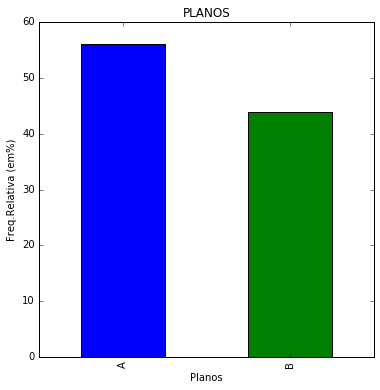

In [12]:
# Gráfico de barras
plot = ut1.plot(kind='bar',title='PLANOS',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Planos')

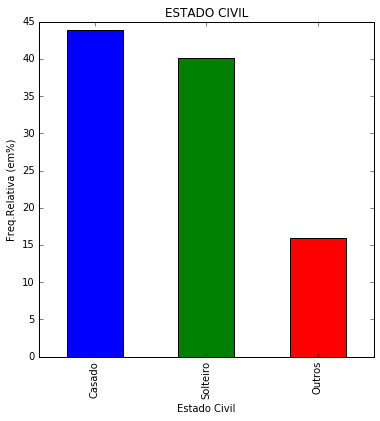

In [13]:
plot = ut2.plot(kind='bar',title='ESTADO CIVIL',figsize=(6, 6),color=('b','g','r'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Estado Civil')

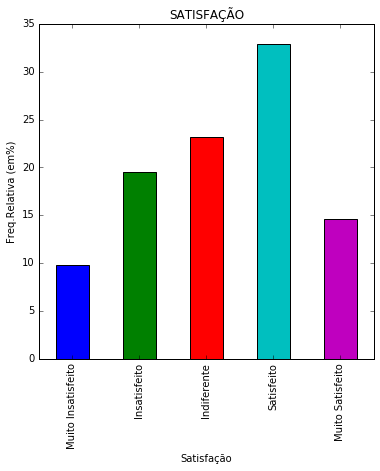

In [14]:
plot = ut3.plot(kind='bar',title='SATISFAÇÃO',figsize=(6, 6),color=('b','g','r','c','m'))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Satisfação')

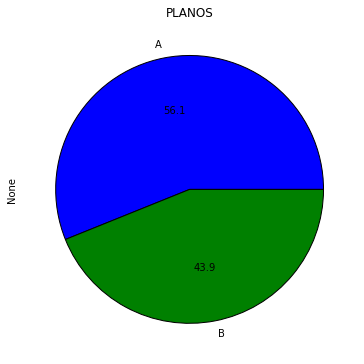

In [15]:
# Gráfico de Pizza
plot = ut1.plot(kind='pie',title='PLANOS',autopct='%.1f',figsize=(6, 6))

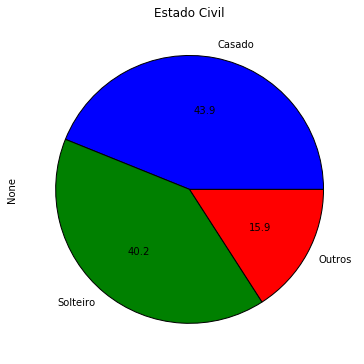

In [16]:
plot = ut2.plot(kind='pie',title='Estado Civil',autopct='%.1f',figsize=(6, 6))

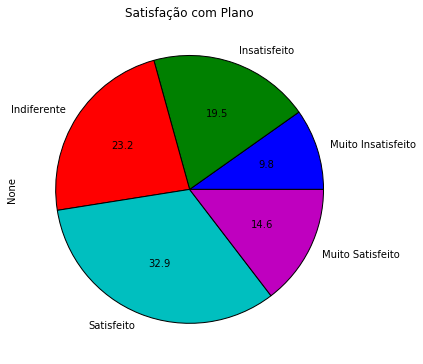

In [17]:
plot = ut3.plot(kind='pie',title='Satisfação com Plano',autopct='%.1f',figsize=(6, 6))

___
## Tabela cruzada entre variáveis qualitativas

In [18]:
#Tabela cruzada Estado Civil x Plano
print('Tabela Cruzada por total GERAL:')
ct=pd.crosstab(dados.EC,dados.PLANO,margins=True,rownames=['ESTADO CIVIL'], colnames=['PLANO'])
ct=ct.loc[['Casado','Solteiro','Outros','All']]
ct

Tabela Cruzada por total GERAL:


PLANO,A,B,All
ESTADO CIVIL,,,
Casado,26,10,36
Solteiro,13,20,33
Outros,7,6,13
All,46,36,82


In [19]:
print('Tabela Cruzada por total GERAL (em %):')
ct1=(ct/len(dados)*100).round(decimals=0)
ct1

Tabela Cruzada por total GERAL (em %):


,A,B,All
ESTADO CIVIL,,,
Casado,32,12,44
Solteiro,16,24,40
Outros,9,7,16
All,56,44,100


In [20]:
#Função que divide cada valor da tabela cruzada pelo total da última linha (quando axis=0) ou da última coluna (quando axis=1)
#Retorna tabela cruzada com valores sem casa decimais
#https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

In [21]:
print('Tabela Cruzada por total de COLUNAS (em %):')
ct2=pd.crosstab(dados.EC,dados.PLANO,margins=True,rownames=['ESTADO CIVIL'], colnames=['PLANO']).apply(percConvert, axis=0)
ct2=ct2.loc[['Casado','Solteiro','Outros','All']]
ct2

Tabela Cruzada por total de COLUNAS (em %):


PLANO,A,B,All
ESTADO CIVIL,,,
Casado,57,28,44
Solteiro,28,56,40
Outros,15,17,16
All,100,100,100


In [22]:
print('Tabela Cruzada por total de LINHAS (em %):')
ct3=pd.crosstab(dados.EC,dados.PLANO,margins=True,rownames=['ESTADO CIVIL'], colnames=['PLANO']).apply(percConvert, axis=1)
ct3=ct3.loc[['Casado','Solteiro','Outros','All']]
ct3

Tabela Cruzada por total de LINHAS (em %):


PLANO,A,B,All
ESTADO CIVIL,,,
Casado,72,28,100
Solteiro,39,61,100
Outros,54,46,100
All,56,44,100


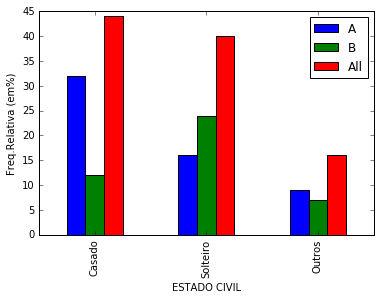

In [23]:
ct1 = pd.crosstab(dados.EC,dados.PLANO,margins=True,rownames=['ESTADO CIVIL'], colnames=['PLANO'])
ct1 = ct1.loc[['Casado','Solteiro','Outros','All']]
ct1 = (ct1/len(dados)*100).round(decimals=0)
ct1 = ct1.iloc[0:3,]
plot = ct1.plot(kind='bar')
plt.ylabel('Freq.Relativa (em%)')

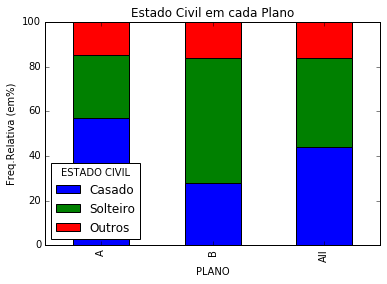

In [24]:
ct2 = pd.crosstab(dados.EC,dados.PLANO,margins=True,rownames=['ESTADO CIVIL'], colnames=['PLANO']).apply(percConvert, axis=0)
ct2 = ct2.loc[['Casado','Solteiro','Outros','All']]
ct2 = ct2.iloc[0:3,:]
plot = ct2.T.plot(kind='bar', stacked=True,title='Estado Civil em cada Plano')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

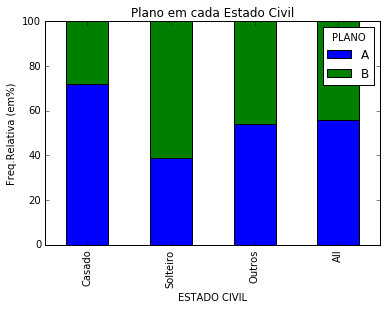

In [25]:
ct3 = pd.crosstab(dados.EC,dados.PLANO,margins=True,rownames=['ESTADO CIVIL'], colnames=['PLANO']).apply(percConvert, axis=1)
ct3 = ct3.loc[['Casado','Solteiro','Outros','All']]
ct3 = ct3.iloc[:,0:2]
plot = ct3.plot(kind='bar', stacked=True,title='Plano em cada Estado Civil')
plt.ylabel('Freq.Relativa (em%)')

PLANO,A,B
ESTADO CIVIL,,
Muito Insatisfeito,25,75
Insatisfeito,31,69
Indiferente,37,63
Satisfeito,74,26
Muito Satisfeito,100,0
All,56,44


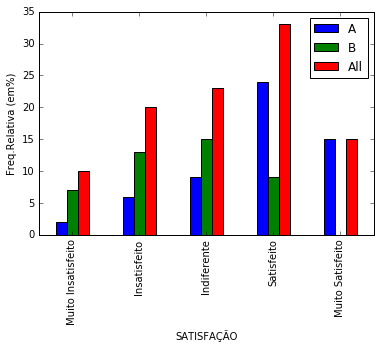

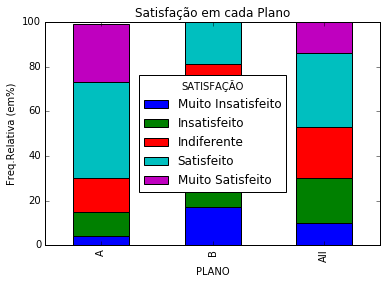

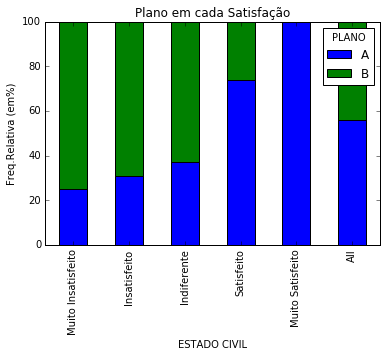

In [26]:
#Analise Satisfação x Plano
ct1 = pd.crosstab(dados.SATISFACAO,dados.PLANO,margins=True,rownames=['SATISFAÇÃO'], colnames=['PLANO'])
ct1 = ct1.loc[['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito','All']]
ct1 = (ct1/len(dados)*100).round(decimals=0)
ct1 = ct1.iloc[0:5,]
plot = ct1.plot(kind='bar')
plt.ylabel('Freq.Relativa (em%)')
ct1

ct2 = pd.crosstab(dados.SATISFACAO,dados.PLANO,margins=True,rownames=['SATISFAÇÃO'], colnames=['PLANO']).apply(percConvert, axis=0)
ct2 = ct2.loc[['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito','All']]
ct2 = ct2.iloc[0:5,:]
plot = ct2.T.plot(kind='bar', stacked=True,title='Satisfação em cada Plano')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
ct2

ct3 = pd.crosstab(dados.SATISFACAO,dados.PLANO,margins=True,rownames=['ESTADO CIVIL'], colnames=['PLANO']).apply(percConvert, axis=1)
ct3 = ct3.loc[['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito','All']]
ct3 = ct3.iloc[:,0:2]
plot = ct3.plot(kind='bar', stacked=True,title='Plano em cada Satisfação')
plt.ylabel('Freq.Relativa (em%)')
ct3

In [27]:
#SO PLANO A
ct4=pd.crosstab(dados.SATISFACAO[dados.PLANO=='A'],dados.EC[dados.PLANO=='A'],margins=True,rownames=['SATISFAÇÃO'], colnames=['ESTADO CIVIL'])
ct4 = ct4.loc[['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito','All'],['Casado','Solteiro','Outros','All']]
ct4 = (ct4/len(dados[dados.PLANO=='A'])*100).round(decimals=0)
ct4

,Casado,Solteiro,Outros,All
SATISFAÇÃO,,,,
Muito Insatisfeito,4,0,0,4
Insatisfeito,4,0,7,11
Indiferente,7,7,2,15
Satisfeito,30,9,4,43
Muito Satisfeito,11,13,2,26
All,57,28,15,100


In [28]:
#SO PLANO B
ct5=pd.crosstab(dados.SATISFACAO[dados.PLANO=='B'],dados.EC[dados.PLANO=='B'],margins=True,rownames=['SATISFAÇÃO'], colnames=['ESTADO CIVIL'])
ct5 = ct5.loc[['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito','All'],['Casado','Solteiro','Outros','All']]
ct5 = (ct5/len(dados[dados.PLANO=='B'])*100).round(decimals=0)
ct5

,Casado,Solteiro,Outros,All
SATISFAÇÃO,,,,
Muito Insatisfeito,6,8,3,17
Insatisfeito,6,14,11,31
Indiferente,6,25,3,33
Satisfeito,11,8,0,19
Muito Satisfeito,0,0,0,0
All,28,56,17,100


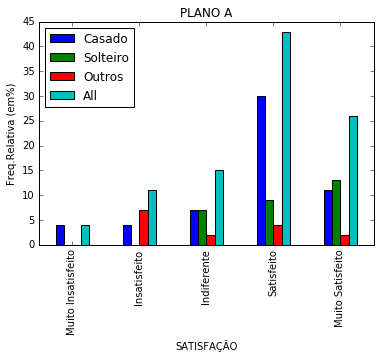

In [29]:
ct4 = ct4.iloc[0:5,]
plot = ct4.plot(kind='bar',title='PLANO A')
plt.ylabel('Freq.Relativa (em%)')

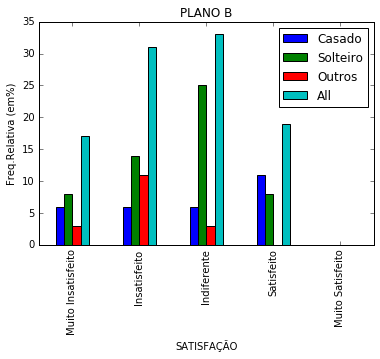

In [30]:
ct5 = ct5.iloc[0:5,]
plot = ct5.plot(kind='bar',title='PLANO B')
plt.ylabel('Freq.Relativa (em%)')